In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['image.cmap'] = 'gray'

In [3]:
def showimagecv2(image, name='a'):
    cv2.imshow(name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 1) Combine as imagens 1a e 1b e resolva a questão que aparece na imagem resultante.

In [4]:
img1a = cv2.imread('1a.bmp')
img1b = cv2.imread('1b.bmp')

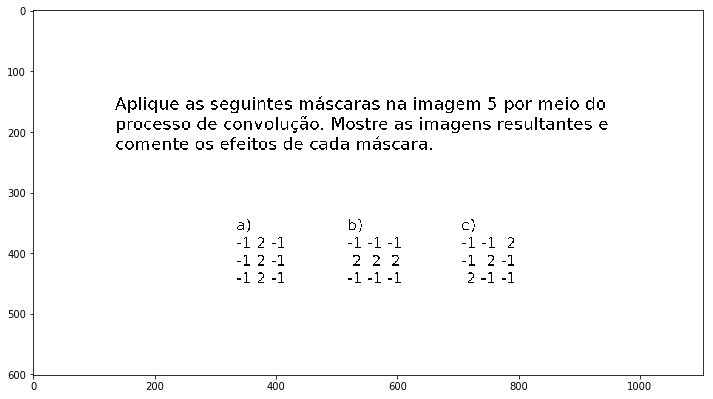

In [5]:
plt.imshow(cv2.bitwise_and(img1a, img1b));

In [6]:
mask_a = np.array([[-1,2,1],[-1,2,-1],[-1,2,-1]])
mask_b = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
mask_c = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])

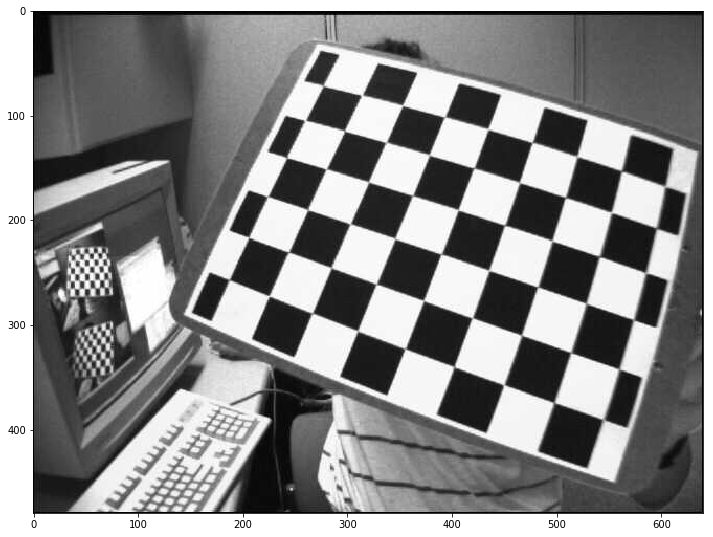

In [7]:
img5 = cv2.imread('5.jpg')
plt.imshow(img5);

### Aplicando máscara A

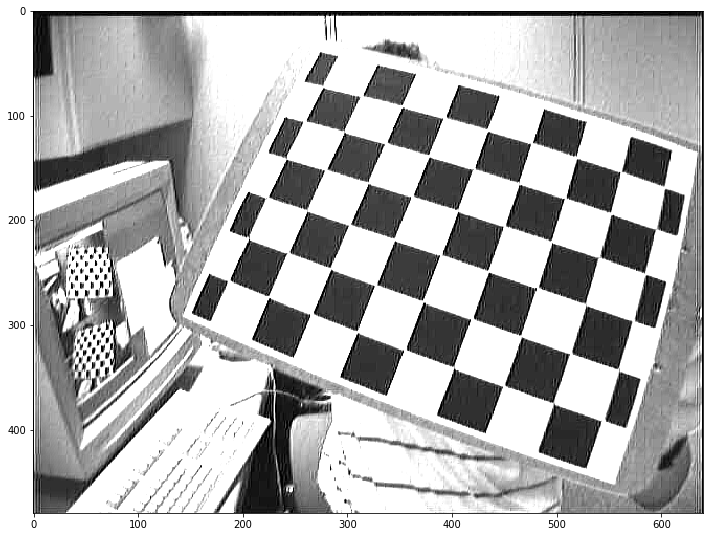

In [8]:
img_5_a = cv2.filter2D(img5, -1, mask_a)
plt.imshow(img_5_a);

### Aplicando máscara B

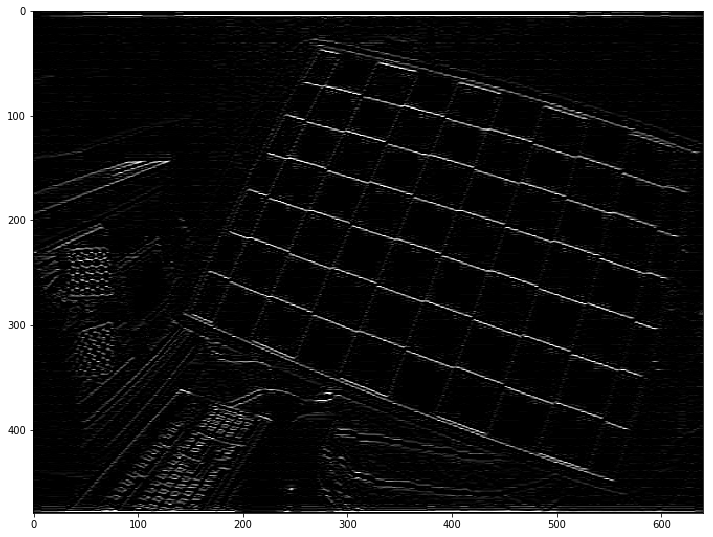

In [9]:
img_5_b = cv2.filter2D(img5, -1, mask_b)
plt.imshow(img_5_b);

### Aplicando máscara C

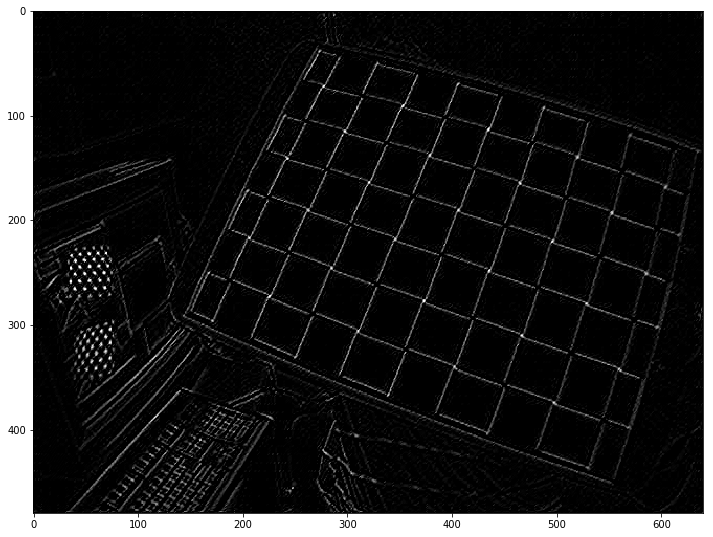

In [10]:
img_5_c = cv2.filter2D(img5, -1, mask_c)
plt.imshow(img_5_c);

# 2) Escolha e aplique uma tranformação gamma que resulte em uma imagem 2 mais amarelada. Indique os parâmetros escolhidos e os passos realizados.

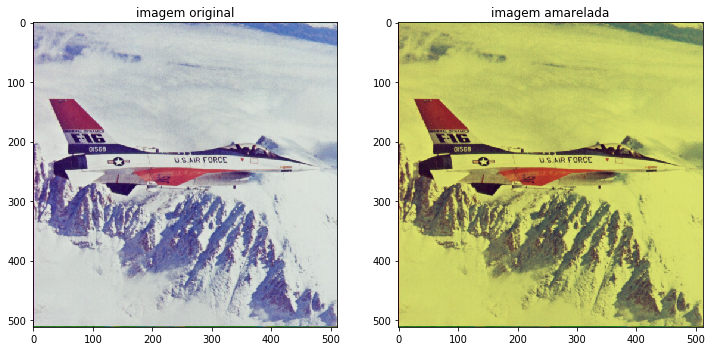

In [11]:
img_2 = cv2.cvtColor(cv2.imread('2.jpg'),cv2.COLOR_BGR2RGB)

new_img_2 = cv2.normalize(img_2 * [2, 2, 1], None, 0, 255, cv2.NORM_MINMAX)

_, ax = plt.subplots(1,2)

ax[0].set_title('imagem original')
ax[0].imshow(img_2)

ax[1].set_title('imagem amarelada')
ax[1].imshow(new_img_2);

# 3) Considere a imagem 3 dividida em 4 quadrantes, como mostrado abaixo. Realize a equalização dos histogramas locais correspondentes aos quadrantes 2 e 3.

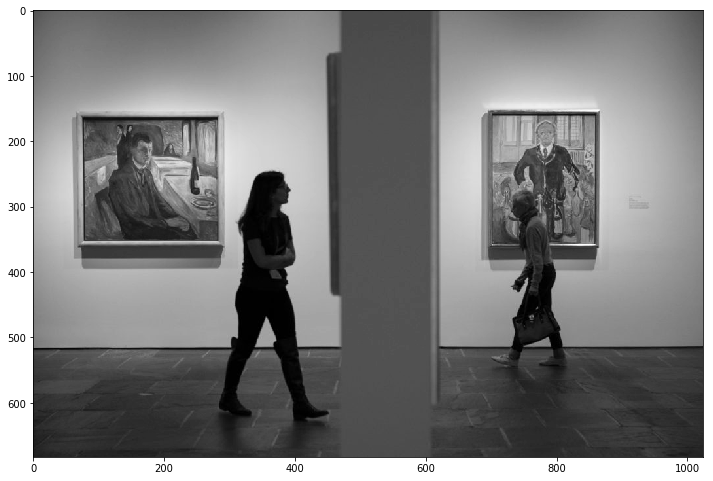

In [12]:
img_3 = cv2.imread('3.jpg', 0)

plt.imshow(img_3);

In [13]:
h, w = img_3.shape

In [14]:
img_3[h//2:, :w//2] = cv2.equalizeHist(img_3[h//2:, :w//2])
img_3[:h//2, w//2:] = cv2.equalizeHist(img_3[:h//2, w//2:])

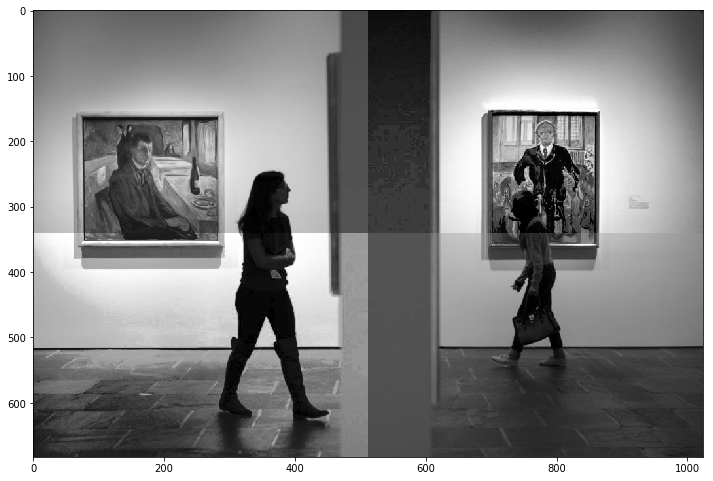

In [15]:
plt.imshow(img_3);

# 4) Mostre como ficaria a imagem 4 caso as cores R,G e B fosses codificadas com apenas 4 bits cada.

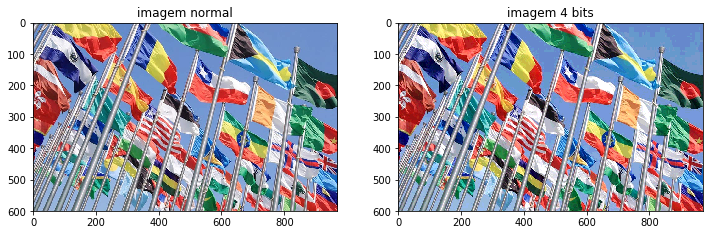

In [16]:
img4 = cv2.cvtColor(cv2.imread('4.jpg'), cv2.COLOR_BGR2RGB)

new_img4 = cv2.normalize(img4//16, None, 0, 255, cv2.NORM_MINMAX)

_, ax = plt.subplots(1, 2)

ax[0].imshow(img4)
ax[0].set_title("imagem normal")

ax[1].imshow(new_img4)
ax[1].set_title("imagem 4 bits");

# 5) Mostre como seria uma imagem NxN, com N=100, caso as únicas componentes de frequência (F u,v ) fossem as componentes F 25,25 , F 10,0 e F 0,10 . Considere a fase igual a 0 e a magnitude com o valor máximo.

In [17]:
n = 100
img_n = np.zeros((n, n))

In [18]:
img_n_fft = np.fft.fftshift(cv2.dft(np.float32(img_n), flags= cv2.DFT_COMPLEX_OUTPUT))

In [19]:
img_magnitude = cv2.magnitude(img_n_fft[:,:,0], img_n_fft[:,:,1])

In [20]:
img_magnitude[25, 25] = 255
img_magnitude[10, 0] = 255
img_magnitude[0, 10] = 255

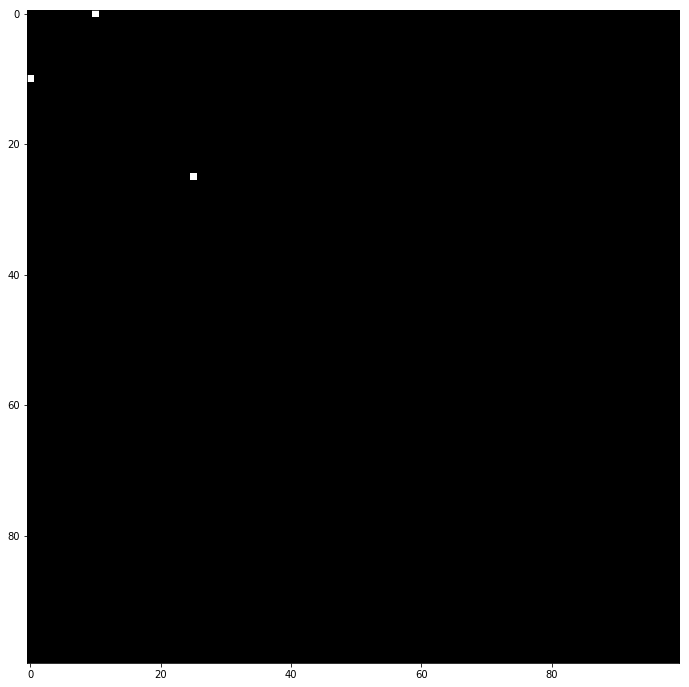

In [21]:
plt.imshow(img_magnitude);

In [22]:
img_back = cv2.idft(np.fft.ifftshift(img_magnitude))

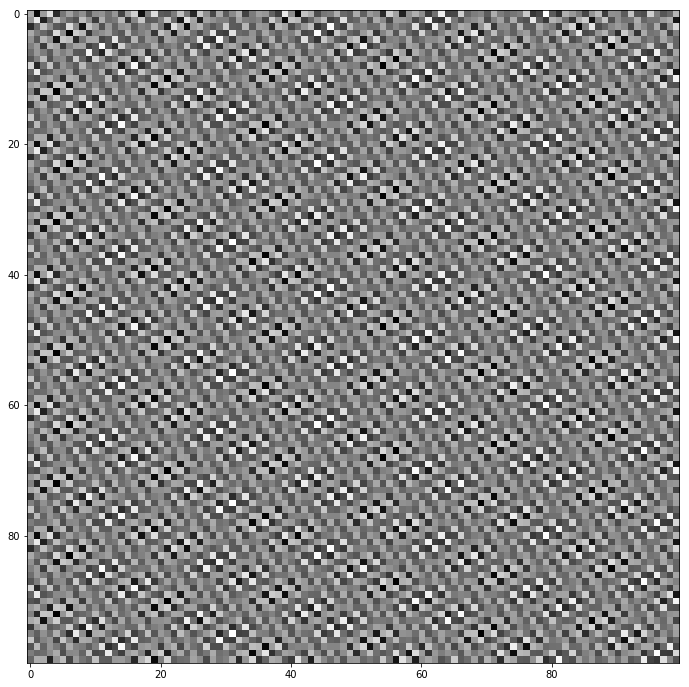

In [23]:
plt.imshow(img_back);

# 6) Faça a coloração da imagem 6 de forma que o resultado final seja uma imagem colorida da bandeira do Brasil.

In [24]:
brasil = cv2.cvtColor(cv2.imread('6.jpeg'), cv2.COLOR_BGR2RGB)

In [25]:
brasil_r, brasil_g, brasil_b = cv2.split(brasil)

In [26]:
l, c = brasil_r.shape

In [27]:
brasil_r.shape

(343, 491)

In [28]:
brasil_r[342, 490]

94

In [29]:
%time
for i in range(l):
    for j in range(c):
        if brasil_r[i, j] < 20 and brasil_g[i, j] < 20 and brasil_g[i, j] < 20:
                brasil_r[i, j] = 0
                brasil_g[i, j] = 0
                brasil_b[i, j] = 255
        elif brasil_r[i, j] < 100 and brasil_g[i, j] < 100 and brasil_g[i, j] < 100:
                brasil_r[i, j] = 0
                brasil_g[i, j] = 180
                brasil_b[i, j] = 0
        elif brasil_r[i, j] < 245 and brasil_g[i, j] < 245 and brasil_g[i, j] < 245:
                brasil_r[i, j] = 200
                brasil_g[i, j] = 200
                brasil_b[i, j] = 0

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [30]:
brasil_color = brasil.copy()

In [31]:
brasil_color[:, :, 0] = brasil_b
brasil_color[:, :, 1] = brasil_g
brasil_color[:, :, 2] = brasil_r

In [32]:
brasil_color.shape

(343, 491, 3)

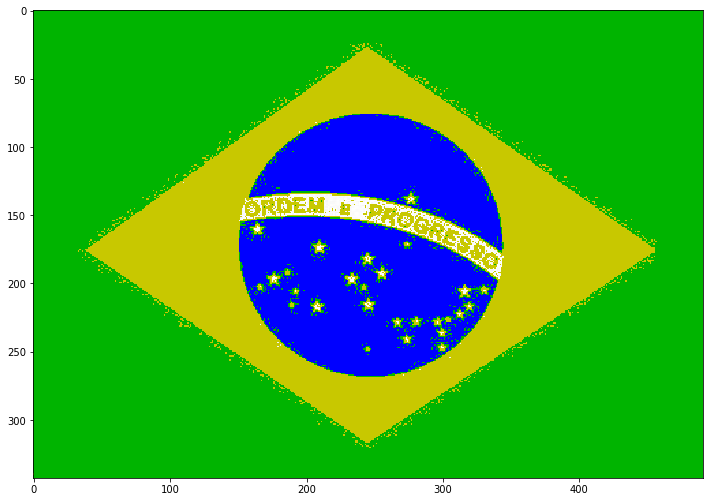

In [33]:
plt.imshow(cv2.cvtColor(brasil_color, cv2.COLOR_BGR2RGB));